In [1]:
import pandas as pd  # Data analysis

import seaborn as sns  #Charts
import matplotlib.pyplot as plt  #Charts

import xlsxwriter  #Write to Excel


In [2]:
borough = ['The Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
pop = [1418207, 2559903, 1628706, 2253858, 476143]
size = [42.10, 70.82, 22.83, 108.53, 58.37]

data = {"borough": borough, "pop": pop, "size": size}

nyc = pd.DataFrame(data)

# Sort from high to low
nyc = nyc.sort_values(by='pop', ascending=False)

nyc

,borough,pop,size
1,Brooklyn,2559903,70.82
3,Queens,2253858,108.53
2,Manhattan,1628706,22.83
0,The Bronx,1418207,42.10
4,Staten Island,476143,58.37


In [3]:
# Write to Excel from pandas, limited formatting
nyc.to_excel('nyc-pandas.xlsx')

## Writing to `xlsxwriter`

This will let you format cells, add charts, etc. 

A few steps to write a `pandas` DataFrame to Excel with `xlsxwriter`:

1. Set `pandas` engine to `xlsxwriter`
2. Convert DataFrame to `xlsxwriter` object
3. Get `xlsxwriter` workbook and worksheet objects from DataFrame writer object
4. Save and close connection.


In [4]:
# 1. Set Pandas engine to xlsxwriter
writer = pd.ExcelWriter('nyc.xlsx', engine='xlsxwriter')

# 2. Convert the dataframe to an XlsxWriter Excel object.
nyc.to_excel(writer, sheet_name='Sheet1', index=False)

# 3. Get the xlsxwriter objects from the DataFrame writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

If we were to open the workbook now, it would look like this:  


<img src="images/nyc-start.png" alt="NYC worksheet start" style="width: 750px"/>

Let's make a few improvements, shall we?

1. Widen column `A`
2. Format column `B` in thousands
3. Add charts (We'll do one Excel chart, one Python chart... why not?)


## Format numbers

We can use `xlsxwriter`'s `set_column()` method: 

```
set_column(first_col, last_col, width, cell_format, options)
```

I will locate the position of each column by name in the DataFrame with the `get_loc()` method from `pandas`:

In [5]:
# Get population index position
borough_col = nyc.columns.get_loc('borough')
borough_col

# Python uses zero-based indexing

0

In [6]:
# Get population index position

pop_col = nyc.columns.get_loc('pop')
pop_col

1

In [7]:
# Re-set width of Borough column
# No auto-fit feature 

worksheet.set_column(borough_col, borough_col, 12)

0

In [8]:
# Set format of Population format to thousands

thousands_format = workbook.add_format({'num_format':'#,##0'})
worksheet.set_column(pop_col, pop_col, None, thousands_format)

0

## Add a chart using Excel

1. Add chart type
2. Add series: `[sheetname, first_row, first_col, last_row, last_col]`
3. Add chart axes, titles, etc.
4. Insert chart into plot 

In [9]:
nyc_chart = workbook.add_chart({'type': 'column'})

# Get total number of rows
max_row = nyc.shape[0]


# Don't include header data ("Oth" row)  in the chart
nyc_chart.add_series({
    'name':       'Borough',
    'categories': ['Sheet1', 1, 0, max_row, 0],
    'values':     ['Sheet1', 1, 1, max_row, 1],
})

# Set chart title
nyc_chart.set_title({'name': 'NYC population by borough'})


# Insert the chart into the worksheet.
worksheet.insert_chart('G2', nyc_chart)


## Add a graph using `seaborn`

1. Create plot in Python
2. Add chart axes, titles, etc.
3. Save image locally
4. Insert it into Excel 

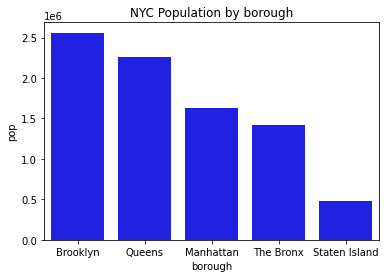

In [10]:
sns.barplot(x='borough', y='pop', data=nyc, color='blue')
plt.title('NYC population by borough')


# Save the image
plt.savefig('images/nyc-pop.png', dpi = (300))


# Add the image to the workbook
worksheet.insert_image('G20', 'nyc-pop.png')

In [11]:
# Close workbook
workbook.close()